# 과적합 Overfitting
## 1. 개념
- 머신러닝과 통계 모델링에서 중요한 문제
- 모델이 훈련 데이터의 노이즈와 세부사항까지 학습하여, 복잡한 패턴을 인식하게 되는 상태
- 모델이 훈련 데이터에 너무 잘 맞아서 검증 데이터나 테스트 데이터에 대한 예측 성능(일반화 능력)이 부족해지는  현상
## 2. 원인
1. 모델 복잡도 
- 너무 많은 파라미터를 가진 복잡한 모델은 훈련 데이터의 모든 세부 사항을 학습하게 됨
2. 데이터 부족
- 훈련 데이터가 적으면 모델이 데이터의 패턴을 일반화하는 대신, 구체적인 세부 사항을 과도하게 학습하게 됨
3. 노이즈 포함
- 데이터에 노이즈가 포함되어 있을 경우, 모델이 노이즈를 학습하게 됨
## 3. 예시
- 훈련 데이터와 테스트 데이터의 오차를 비교했을 때, 훈련 데이터에 대한 오차는 매우 낮지만 테스트 데이터에 대한 오차는 높은 경우, 과적합에 발생했다고 판단
- 과소적합 Underfitting
    - 모델이 데이터 패턴을 충분히 학습하지 못한 경우
    - 데이터 포인트와 모델의 예측 사이에 큰 오차가 존재
- 적합 Fitting
    - 모델이 데이터의 패턴을 잘 학습한 경우
    - 데이터 포인트와 모델의 예측이 잘 일치
- 과적합 Overfitting
    - 모델이 데이터의 노이즈와 세부 사항까지 학습한 경우
    - 데이터 포인트와 모델의 예측이 훈련 데이터에서는 잘 일치하지만, 새로운 데이터에서는 큰 오차가 발생
## 4. 수식
- 선형 회귀에서의 과적합

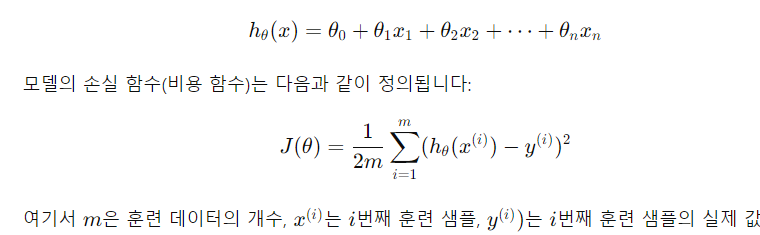

- 과적합된 모델은 J(θ)가 훈련 데이터에서 매우 작은 값을 가짐
- 새로운 데이터에 대해서는 큰 값을 가짐
## 5. 과적합 방지 방법
1. 더 많은 데이터 수집
- 많은 훈련 데이터를 준비하여 모델이 데이터의 일반적인 패턴을 더 잘 학습할 수 있음
2. 데이터 증강 Data Augmentation
- 인위적으로 훈련 데이터의 크리를 늘릴 수 있음
- 예를 들어, 이미지 데이터의 경우, 회전, 확대, 축소 등의 변환을 통해 데이터를 증가시킬 수 있음
3. 모델의 복잡도 줄이기
- 특징 선택 Feature Selection
    - 중요하지 않은 특징을 제거하여 모델의 복잡도를 줄임
- 차원 축소 Dimensionality Reduction
    - PCA와 같은 기법을 사욯하여 데이터의 차원을 줄임
4. 정규화 Regularization
- 정규화 기법을 사용하여 모델의 복잡도를 제어 가능
- L1 정규화 Lasso
    - 손실 함수에 가중치의 절대값 합을 추가하여 모델의 복잡도를 줄임

    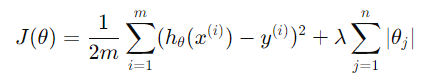

- L2 정규화 Ridge
    - 손실 함수에 가중치의 제곱 합을 추가하여 모델의 복잡도를 줄임

    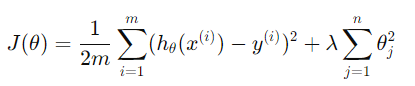

5. 교차 검증 Cross-Validation
- 모델의 성능을 평가하고 과적합을 방지할 수 있음
- 대표적으로 k-겹 교차 검증K-Fold Cross-Validation
6. 조기 종료 Early Stopping
- 신경망 훈련 시, 검증 데이터의 성능이 더 이상 개선되지 않으면 훈련을 조기에 종료하여 과적합을 방지할 수 있음

## 6. 과소적합 Underfitting 간단 정리
### 1. 개념
- 모델이 훈련 데이터의 패턴을 제대로 학습하지 못한 상태
- 훈련 데이터와 테스트 데이터 모두에서 성능이 저조
### 2. 원인 
- 모델이 너무 단순한 경우(예, 복잡한 데이터를 선형 회구로 학습한 경우)
- 훈련 데이터가 너무 적은 경우
- 충분히 오래 훈련되지 않은 경우
- 중요한 피처가 누락된 경우
### 3. 해결 방법
- 더 복잡한 모델 사용
- 더 많은 데이터를 수집
- 모델 학습 시간 연장
- 중요한 피처를 추가

In [1]:
import pandas as pd
import numpy as np

wine = pd.read_csv('https://bit.ly/wine-date')
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 입력 데이터와 타겟 데이터 분리
X = wine[['alcohol', 'sugar', 'pH']]
y = wine['class']

# 데이터를 훈련 세트와 테스트 세트로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [3]:
# KNN을 이용한 모델 학습 및 평가

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# KNN 모델 정의
# K=3
knn = KNeighborsClassifier(n_neighbors=3)  
knn.fit(X_train_scaled, y_train)

# 예측
train_pred_knn = knn.predict(X_train_scaled)
test_pred_knn = knn.predict(X_test_scaled)

# 정확도 평가
print(f"KNN Train Accuracy: {accuracy_score(y_train, train_pred_knn):.2f}")
print(f"KNN Test Accuracy: {accuracy_score(y_test, test_pred_knn):.2f}")

KNN Train Accuracy: 0.93
KNN Test Accuracy: 0.83


In [4]:
# 과적합 해결하기 위해 K 값 조정
# K값을 늘리면 모델 복잡도가 낮아져 과적합이 줄어들 수 있음

# K=5로 설정한 KNN 모델
# K = 5
knn_pruned = KNeighborsClassifier(n_neighbors=5)
knn_pruned.fit(X_train_scaled, y_train)

# 예측
train_pred_knn_pruned = knn_pruned.predict(X_train_scaled)
test_pred_knn_pruned = knn_pruned.predict(X_test_scaled)

# 정확도 평가
print(f"KNN (K=5) Train Accuracy: {accuracy_score(y_train, train_pred_knn_pruned):.2f}")
print(f"KNN (K=5) Test Accuracy: {accuracy_score(y_test, test_pred_knn_pruned):.2f}")

KNN (K=5) Train Accuracy: 0.90
KNN (K=5) Test Accuracy: 0.83


### 결과 해석
K가 3일 때, KNN Train Accuracy: 0.93 / KNN Test Accuracy: 0.83
- 훈련 데이터에서 모델이 높은 정확도를 보임
- 테스트 데이터에서 모델 정확도가 살짝 낮아짐
    - 훈련 데이터에 비해 테스트 데이터가 일반화가 잘 되지 않았음을 확인
- 높은 훈련 정확도와 낮은 테스트 정확도는 과적합의 징후

K가 5일 때, KNN (K=5) Train Accuracy: 0.90 / KNN (K=5) Test Accuracy: 0.83
- 훈련 데이터의 정확도가 K = 3일 때 보다 낮아짐
- K = 3 일 때와 테스트 정확도 동일
- 훈련 데이터와 테스트 데이터의 정확도 차이가 줄어듬
- K = 5일 때 성능 차이가 적어져 과적합이 줄어듬

# 정규화 Regularization
## 1. 개념
- 머신러닝 모델의 복잡성을 제어하고 과적합을 방지하기 위해 사용되는 기술
- 모델의 파라미터에 제약을 부여하여 더 일반화된 모델을 만드는 데 도움
- 모델이 훈련 데이터에 너무 과적합되는 것을 막고, 새로운 데이터에 대한 성능을 향상 시킴
## 2. L1 정규화 Lasso
- 모델의 가중치의 절대값 합에 패널티를 부여
- 가중치 벡터의 L1 노름을 최소화하려고 함
- 일부 가중치를 정확히 0으로 만드는 특성이 있으며, 이를 통해 feature Selection을 수행
### 목적
- 가중치를 0으로 만들어 feature selection 수행하고 모델을 단순화 함
### 수식

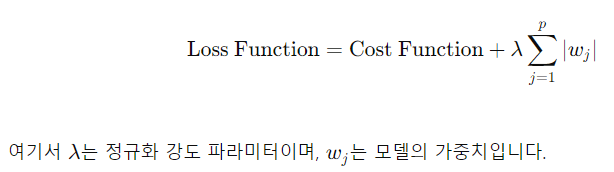

## 3. L2 정규화 Ridge
- 모델의 가중치 제곱합에 패널티를 부여
- 가중치 벡터의 L2 노름을 최소화하려고 함
- 가중치 값을 작게 만들어서 모델의 복잡성을 줄이고 과적합을 방지
### 목적
- 가중치를 작게 만들어 모델의 복잡성을 줄이고 과적합을 방지
### 수식

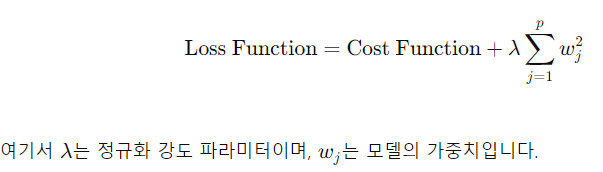

## 4. Elastic Net
- L1, L2 정규화의 혼합
- L1과 L2 패널티를 모두 사용하여 모델의 가중치에 제약을 부여
- feature selection과 가중치 감소 모두 수행 가능
- 특히 변수의 수가 많은 경우 유용
### 목적
- L1, L2 정규화의 장점을 결합하여 feature selection과 가중치 감소를 모두 수행
### 수식

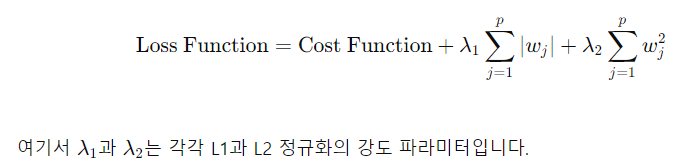

## 5. Regularization 작동 방식
- 모델의 손실 함수에 패널티 항을 추가하여 과적합을 방지
- 패널티 팡은 모델의 복잡성을 제어하며, 복잡한 모델보다는 간단한 모델을 선호
- 정규화 강도 파라미터 λ는 패널티의 강도를 조절하며, 이를 통해 모델의 복잡성을 조절
- 강도 파라미터 λ 역할
    - 작은 λ : 패털티가 작아서 모델이 복잡
    - 큰 λ : 패널티가 커져서 모델이 간단하고 과적합이 줄어들 수 있음
## 6. 정규화 장점
- 과적합을 방지하여 모델의 일반화 성능을 향상시킴
- 모델의 복잡성을 제어하여 해석 가능성을 높임
- L1 정규화는 feature selection이 있어 변수의 수를 줄이는 데 유용
## 7. 정규화 단점
- 정규화 강도λ를 적절히 선택해야 하며, 실험과 검증을 통해 결정
- L1 정규화는 모든 가중치를 0으로 만들 수 있어, feature selection이 지나치게 될 수 있음
- L2 정규화는 모든 가중치를 작게 만들지만, 0으로 만들지 않으므로, 가끔 feature selection에 제한적